### Importing Necessary libraries

https://www.kaggle.com/code/imdevskp/western-africa-ebola-outbreak-analysis

In [367]:
 # processing and storing in dataframe
import pandas as pd 

# numerical analysis
import numpy as np  

# basic plotting
import matplotlib.pyplot as plt 

#advanced plotting
import seaborn as sns

#interactive plotting
import plotly.express as px

# dealing with geographical data
import geopandas as gpd

#to get geolocation
from geopandas.tools import geocode

### DATA CLEANING AND PREPROCESSING 


Read the Data

In [368]:
df = pd.read_csv('ebola_2014_2016_clean.csv')

In [369]:
df.columns

Index(['Country', 'Date',
       'Cumulative no. of confirmed, probable and suspected cases',
       'Cumulative no. of confirmed, probable and suspected deaths'],
      dtype='object')

In [370]:
df.head()  # It will show the 1st 5 details

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0


In [371]:
df.info() # To check the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Country                                                     2485 non-null   object 
 1   Date                                                        2485 non-null   object 
 2   Cumulative no. of confirmed, probable and suspected cases   2477 non-null   float64
 3   Cumulative no. of confirmed, probable and suspected deaths  2485 non-null   float64
dtypes: float64(2), object(2)
memory usage: 77.8+ KB


In [372]:
df['Country'].unique()

array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       'United States of America', 'Spain', 'Mali', 'United Kingdom',
       'Italy'], dtype=object)

In [373]:
print(df['Date'].min())
print(df['Date'].max())

2014-08-29
2016-03-23


In [374]:
df.shape

(2485, 4)

In [375]:
# rename the columns--to make it more readable

df = df.rename(columns = {'Cumulative no. of confirmed, probable and suspected cases':'cumulative no. cases',
                          'Cumulative no. of confirmed, probable and suspected deaths':'cumulative no. deaths'
                         })
           

In [376]:
df.columns

Index(['Country', 'Date', 'cumulative no. cases', 'cumulative no. deaths'], dtype='object')

In [377]:
df.tail()

,Country,Date,cumulative no. cases,cumulative no. deaths
2480,Liberia,2016-03-23,10666.0,4806.0
2481,Italy,2016-03-23,1.0,0.0
2482,Liberia,2016-03-23,5.0,4.0
2483,Nigeria,2016-03-23,20.0,8.0
2484,United States of America,2016-03-23,4.0,1.0


Make copy of the original data for further work

In [378]:
new_df = df.copy()

In [379]:
new_df.head(3)

,Country,Date,cumulative no. cases,cumulative no. deaths
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0


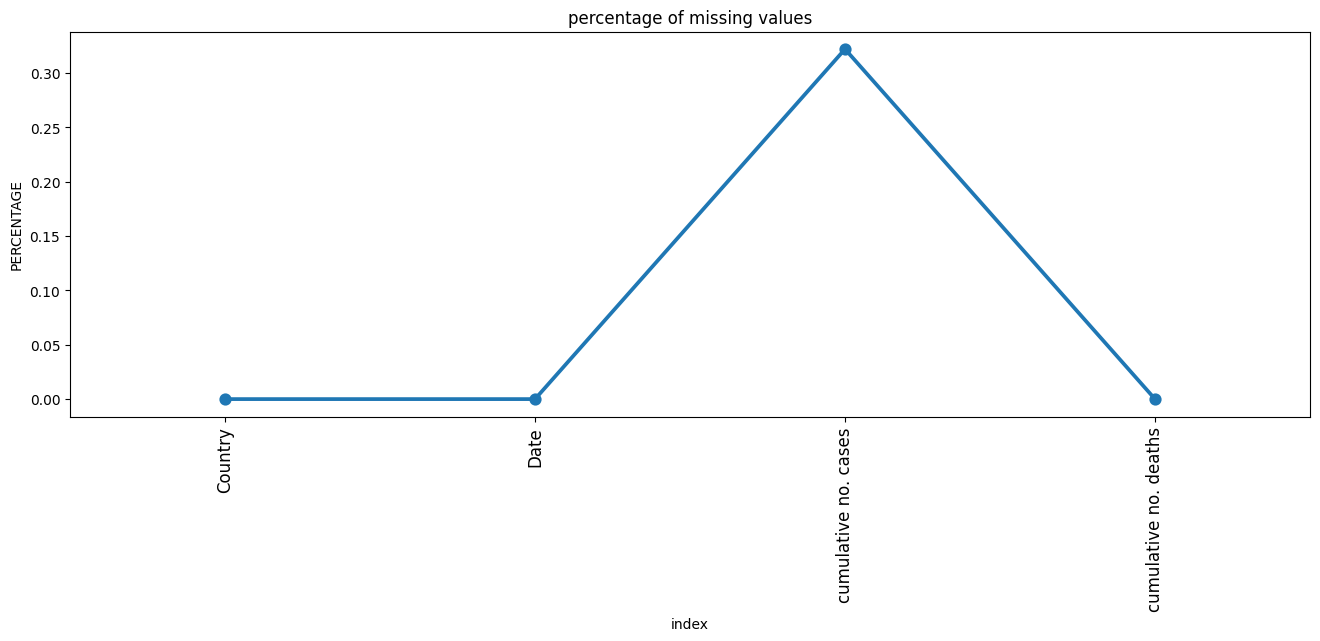

In [380]:
missing = pd.DataFrame((new_df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize = (16, 5))
ax = sns.pointplot(x='index', y=0 ,data=missing)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [381]:
new_df.describe()

,cumulative no. cases,cumulative no. deaths
count,2477.000000,2485.000000
mean,2553.678644,1028.347686
std,4427.118148,1656.064372
min,0.000000,0.000000
25%,1.000000,0.000000
50%,8.000000,6.000000
75%,3657.000000,2386.000000
max,14122.000000,4806.000000


In [382]:
new_df.isnull().sum()

Country                  0
Date                     0
cumulative no. cases     8
cumulative no. deaths    0
dtype: int64

In [383]:
# Check for null values
null_rows = new_df[new_df['cumulative no. cases'].isnull()]

In [384]:
null_rows

,Country,Date,cumulative no. cases,cumulative no. deaths
301,United Kingdom,2015-01-08,NaN,0.0
302,Mali,2015-01-08,NaN,6.0
306,Mali,2015-01-09,NaN,6.0
308,United Kingdom,2015-01-09,NaN,0.0
312,United Kingdom,2015-01-12,NaN,0.0
314,Mali,2015-01-12,NaN,6.0
316,United Kingdom,2015-01-13,NaN,0.0
317,Mali,2015-01-13,NaN,6.0


In [385]:
len(new_df)

2485

In [386]:
# HANDLING MISSING VALUES (according to indexes)
#index_to_drop = [301, 308, 312, 316]
# new_df = new_df.drop(index_to_drop, axis=0)

# Since indexes 301, 308, 312, 316 does not contain any value in any of the column, hence drooping those columns wont affect the overall result.
# Hence indexes 301, 308, 312, 316 have been dropped above

# Check for null values
# null_rows = new_df[new_df['cumulative no. cases'].isnull()]
# null_rows

In [387]:
new_df = new_df.dropna()

In [388]:
null_rows = new_df[new_df['cumulative no. cases'].isnull()]
# null_rows

In [389]:
new_df.isnull().sum()

Country                  0
Date                     0
cumulative no. cases     0
cumulative no. deaths    0
dtype: int64

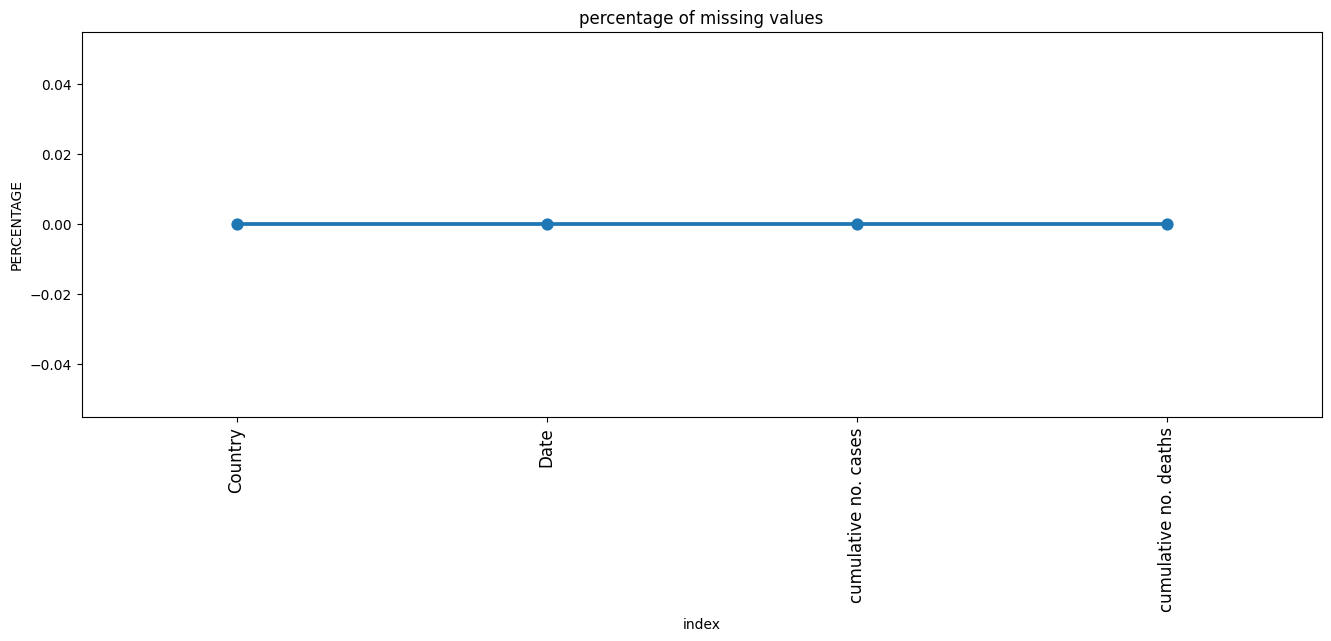

In [390]:
# Again checking for missing values

missing = pd.DataFrame((new_df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize = (16, 5))
ax = sns.pointplot(x='index', y=0 ,data=missing)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [391]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2484
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2477 non-null   object 
 1   Date                   2477 non-null   object 
 2   cumulative no. cases   2477 non-null   float64
 3   cumulative no. deaths  2477 non-null   float64
dtypes: float64(2), object(2)
memory usage: 96.8+ KB


In [392]:
len(new_df)

2477

In [393]:
# group by date and country
new_df = new_df.groupby(['Country','Date'])[['cumulative no. cases', 'cumulative no. deaths']].sum().reset_index()

In [394]:
len(new_df)

2371

In [395]:
new_df.tail(3)

,Country,Date,cumulative no. cases,cumulative no. deaths
2368,United States of America,2015-12-23,4.0,1.0
2369,United States of America,2015-12-29,4.0,1.0
2370,United States of America,2016-03-23,4.0,1.0


In [396]:
# Check for duplicate rows based on 'Country' and 'Date'
duplicate_rows = new_df[new_df.duplicated(subset=['Country','Date'], keep=False)]

if duplicate_rows.empty:
    print("No duplicate rows found based on 'Country' and 'Date'.")
else:
    print("Duplicate rows based on 'Country' and 'Date':")
    print(duplicate_rows)

No duplicate rows found based on 'Country' and 'Date'.


In [397]:
new_df.head(3)

,Country,Date,cumulative no. cases,cumulative no. deaths
0,Guinea,2014-08-29,648.0,430.0
1,Guinea,2014-09-05,812.0,517.0
2,Guinea,2014-09-08,862.0,555.0


In [398]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2371 non-null   object 
 1   Date                   2371 non-null   object 
 2   cumulative no. cases   2371 non-null   float64
 3   cumulative no. deaths  2371 non-null   float64
dtypes: float64(2), object(2)
memory usage: 74.2+ KB


In [399]:
# Convert the float column to integers
new_df['cumulative no. deaths'] = new_df[['cumulative no. deaths']].astype(int)

In [400]:
# Convert the float column to integers
new_df['cumulative no. cases'] = new_df[['cumulative no. cases']].astype(int)

In [401]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                2371 non-null   object
 1   Date                   2371 non-null   object
 2   cumulative no. cases   2371 non-null   int64 
 3   cumulative no. deaths  2371 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 74.2+ KB


In [402]:
# CFR
new_df['CFR(in%)'] = round((new_df['cumulative no. deaths'] / new_df['cumulative no. cases']) * 100, 2)

In [403]:
new_df.tail()

,Country,Date,cumulative no. cases,cumulative no. deaths,CFR(in%)
2366,United States of America,2015-12-17,4,1,25.0
2367,United States of America,2015-12-22,4,1,25.0
2368,United States of America,2015-12-23,4,1,25.0
2369,United States of America,2015-12-29,4,1,25.0
2370,United States of America,2016-03-23,4,1,25.0


In [404]:
new_df.isnull().sum()

Country                  0
Date                     0
cumulative no. cases     0
cumulative no. deaths    0
CFR(in%)                 2
dtype: int64

In [405]:
new_df[new_df['CFR(in%)'].isna()]

,Country,Date,cumulative no. cases,cumulative no. deaths,CFR(in%)
1909,United Kingdom,2015-01-02,0,0,NaN
1910,United Kingdom,2015-01-05,0,0,NaN


In [406]:
new_df = new_df.dropna()

In [407]:
 # new_df = new_df.fillna(0)

In [408]:
new_df.isnull().sum()

Country                  0
Date                     0
cumulative no. cases     0
cumulative no. deaths    0
CFR(in%)                 0
dtype: int64

In [409]:
# Calculate daily increments in new cases and new deaths
temp = new_df.groupby(['Country', 'Date'])[['cumulative no. cases', 'cumulative no. deaths']].sum().diff().reset_index()

# Create a mask to identify the first entry for each country
mask = temp['Country'] != temp['Country'].shift(1)

# Set the first entry for each country to NaN
temp.loc[mask, 'cumulative no. cases'] = np.nan
temp.loc[mask, 'cumulative no. deaths'] = np.nan

# Rename columns in temp
temp.columns = ['Country', 'Date', 'New cases', 'New deaths']

# Merge temp with new_df
new_df = pd.merge(new_df, temp, on=['Country', 'Date'])

# Fill NaN values with 0
new_df = new_df.fillna(0)

# Convert data types of 'New cases' and 'New deaths' to int
cols = ['New cases', 'New deaths']
new_df[cols] = new_df[cols].astype('int')

# Ensure 'New cases' is non-negative
new_df['New cases'] = new_df['New cases'].apply(lambda x: 0 if x < 0 else x)

new_df.head()

,Country,Date,cumulative no. cases,cumulative no. deaths,CFR(in%),New cases,New deaths
0,Guinea,2014-08-29,648,430,66.36,0,0
1,Guinea,2014-09-05,812,517,63.67,164,87
2,Guinea,2014-09-08,862,555,64.39,50,38
3,Guinea,2014-09-12,861,557,64.69,0,2
4,Guinea,2014-09-16,936,595,63.57,75,38


In [410]:
new_df.tail()

,Country,Date,cumulative no. cases,cumulative no. deaths,CFR(in%),New cases,New deaths
2364,United States of America,2015-12-17,4,1,25.0,0,0
2365,United States of America,2015-12-22,4,1,25.0,0,0
2366,United States of America,2015-12-23,4,1,25.0,0,0
2367,United States of America,2015-12-29,4,1,25.0,0,0
2368,United States of America,2016-03-23,4,1,25.0,0,0


In [411]:
new_df.isnull().sum()

Country                  0
Date                     0
cumulative no. cases     0
cumulative no. deaths    0
CFR(in%)                 0
New cases                0
New deaths               0
dtype: int64

In [412]:
new_df.columns

Index(['Country', 'Date', 'cumulative no. cases', 'cumulative no. deaths',
       'CFR(in%)', 'New cases', 'New deaths'],
      dtype='object')

In [413]:
new_df.describe()


,cumulative no. cases,cumulative no. deaths,CFR(in%),New cases,New deaths
count,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000
mean,2670.097932,1078.691431,29.853225,11.216969,4.121992
std,4493.185442,1680.322680,26.777053,64.781404,26.032316
min,1.000000,0.000000,0.000000,0.000000,-440.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,6.000000,29.190000,0.000000,0.000000
75%,3750.000000,2440.000000,45.050000,0.000000,0.000000
max,14122.000000,4813.000000,100.000000,1870.000000,471.000000


AFTER FINDING THE PRESENCE OF OUTLIERS----
1) CHECKING MISSING VALUES
2) CHECKING AND REMOVING DUBLICATE COLUMNS OR COMBINING (LETS SEE)

In [414]:
new_df.head()

,Country,Date,cumulative no. cases,cumulative no. deaths,CFR(in%),New cases,New deaths
0,Guinea,2014-08-29,648,430,66.36,0,0
1,Guinea,2014-09-05,812,517,63.67,164,87
2,Guinea,2014-09-08,862,555,64.39,50,38
3,Guinea,2014-09-12,861,557,64.69,0,2
4,Guinea,2014-09-16,936,595,63.57,75,38


## REGRESSION RANDOM FOREST

In [415]:
dummy_new_df = new_df.copy()
dummy_new_df = dummy_new_df.drop(['Date'],axis=1)
type(dummy_new_df)

pandas.core.frame.DataFrame

In [416]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



In [417]:
# Create a LabelEncoder for the 'Country' column
country_encoder = LabelEncoder()
dummy_new_df['Country'] = country_encoder.fit_transform(dummy_new_df['Country'])

In [418]:
dummy_new_df.head()

,Country,cumulative no. cases,cumulative no. deaths,CFR(in%),New cases,New deaths
0,0,648,430,66.36,0,0
1,0,812,517,63.67,164,87
2,0,862,555,64.39,50,38
3,0,861,557,64.69,0,2
4,0,936,595,63.57,75,38


In [419]:
# Split the data into features (X) and target (Y)
X1 = dummy_new_df.drop(['cumulative no. deaths', 'CFR(in%)'], axis=1)
Y1 = dummy_new_df['cumulative no. deaths']

# Use one-hot encoding for the 'Country' column
ct = ColumnTransformer(transformers=[('one_hot', OneHotEncoder(), [0])], remainder='passthrough')
X1_encoded = ct.fit_transform(X1)

# Create training and testing sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_encoded, Y1, test_size=0.2, random_state=42)

# Create and train a random forest regressor
model = RandomForestRegressor(n_estimators=300)
model.fit(X1_train, Y1_train)

RandomForestRegressor(n_estimators=300)

In [420]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot', OneHotEncoder(), [0])])

## EVALUATE THE MODEL

In [447]:
# Evaluate the model
score = model.score(X1_train, Y1_train)

print(f'R-squared score: {score}\n')

print("model score in% ")
model.score(X1_train, Y1_train)*100

R-squared score: 0.9999445707416927

model score in% 


99.99445707416928

In [459]:

# Make predictions on the test data
Y1_predict = model.predict(X1_train)

# Calculate the R-squared (coefficient of determination)
r2 = r2_score(Y1_train, Y1_predict)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(Y1_train, Y1_predict)

mae = mean_absolute_error(Y1_train, Y1_predict)


# Print the R-squared and MSE
print(f"R-squared (R²): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute error (MAE):{mae}")





MAE = pd.DataFrame(data={"Actual values": Y1_train,
                         "Predicted values": Y1_predict
                           })

MAE["Differences"] = MAE["Predicted values"]- MAE["Actual values"]

R-squared (R²): 0.9999445707416927
Mean Squared Error (MSE): 154.1059587188348
Mean absolute error (MAE):2.212823581677626


In [421]:
# Evaluate the model
score = model.score(X1_test, Y1_test)

print(f'R-squared score: {score}\n')

print("model score in% ")
model.score(X1_test, Y1_test)*100

R-squared score: 0.9993548418062004

model score in% 


99.93548418062004

In [454]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Make predictions on the test data
Y1_pred = model.predict(X1_test)

# Calculate the R-squared (coefficient of determination)
r2 = r2_score(Y1_test, Y1_pred)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(Y1_test, Y1_pred)

mae = mean_absolute_error(Y1_test, Y1_pred)


# Print the R-squared and MSE
print(f"R-squared (R²): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute error (MAE):{mae}")


MAE = pd.DataFrame(data={"Actual values": Y1_test,
                            "Predicted values": Y1_pred
                           })

MAE["Differences"] = MAE["Predicted values"]- MAE["Actual values"] 

R-squared (R²): 0.9993548418062004
Mean Squared Error (MSE): 1920.9992621346876
Mean absolute error (MAE):7.683103166150208


## PREDICTIVE SYSTEM

In [423]:
dummy_new_df.head()

,Country,cumulative no. cases,cumulative no. deaths,CFR(in%),New cases,New deaths
0,0,648,430,66.36,0,0
1,0,812,517,63.67,164,87
2,0,862,555,64.39,50,38
3,0,861,557,64.69,0,2
4,0,936,595,63.57,75,38


In [426]:
def prediction(country, cumulative_cases, new_cases, new_deaths):
    try:
        # Encode the user input 'country'
        transformed_country = country_encoder.transform([country])
        # Create a user data array with the encoded 'country' and other input features
        user_data = [transformed_country[0], cumulative_cases, new_cases, new_deaths]
        # Transform the user data using the same ColumnTransformer
        transformed_data = ct.transform([user_data])
        # Predict the result using the pre-trained model
        result = model.predict(transformed_data)
        return result[0]
    except ValueError:
        # Handle the case of an unknown 'country' label
        return None

# User input
country = 'Guinea'
cumulative_cases = 648
new_cases = 0
new_deaths = 0

# Make a prediction
user_predictions = prediction(country, cumulative_cases, new_cases, new_deaths)

if user_predictions is not None:
    print(f"Predicted cumulative deaths:", user_predictions)
else:
    print("Invalid data or prediction is not available")


Predicted cumulative deaths: 460.21666666666664


/Users/sadafrizwan/Desktop/college_work/Ebola/ebola_venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


## Saving the trained model

In [427]:
import pickle

In [429]:
filename = 'EbolaModelReg.pkl'
pickle.dump(model,open(filename, 'wb')) 


In [431]:
pickle.dump(ct,open('ct.pkl', 'wb'))

In [432]:
pickle.dump(country_encoder, open('country_encoder.pkl', 'wb'))